# Machine Learning - Projet 1 : les pingouins

## Auteur : Nicolas Lejay

## Octobre 2023

***
## Chargement des données

In [1]:
import pandas as pd

df_peng = pd.read_csv('src/penguins_size.csv')
df_peng.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
df_peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Peu de données sont manquantes. Dans la suite nous n'utiliserons pas les variables "sex" et "island". Nous pouvons les supprimer et également supprimer les lignes ayant des valeurs manquantes sur les autres variables.

In [3]:
df_peng = df_peng.drop(['sex', 'island'], axis=1)
df_peng = df_peng.dropna()

In [4]:
df_peng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


Quelles sont les espèces ? Quel est le nombre d'individus par espèce ?

In [5]:
df_peng.groupby('species')['species'].count()

species
Adelie       151
Chinstrap     68
Gentoo       123
Name: species, dtype: int64

***
## 1. Partition en utilisant un arbre de profondeur 1.

Entraînement d'un arbre de décision de profondeur 1

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Instanciation d'un objet DecisionTreeClassifier
tree_model1 = DecisionTreeClassifier(max_depth=1)

# Données d'entraînement
X = df_peng.drop(['species','flipper_length_mm', 'body_mass_g'], axis=1)
y = df_peng['species']

# Entraînement model
tree_model1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

## 2. Représentation des individus selon la longueur et la profondeur de leur culmen.

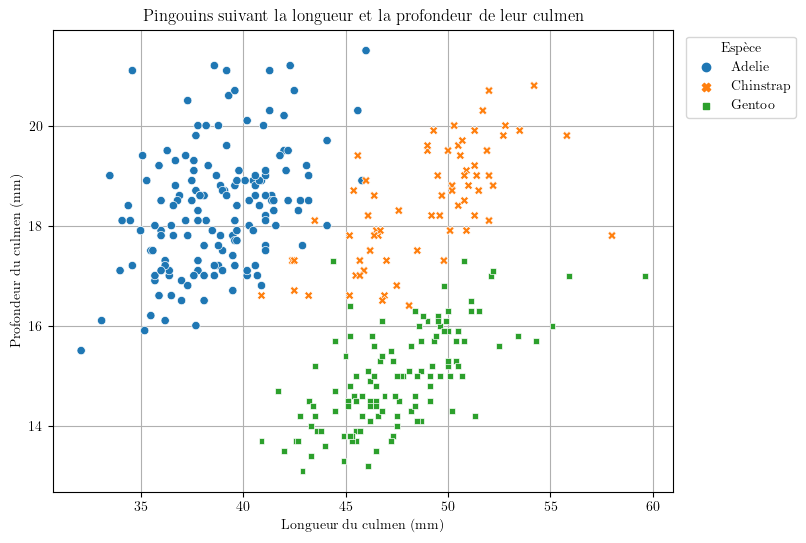

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})

# Scatterplot de la profondeur du culmen des pingouins vs longueur du culmen
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df_peng, x='culmen_length_mm', y='culmen_depth_mm',
                hue='species', style='species')

# titre et labels
plt.title("Pingouins suivant la longueur et la profondeur de leur culmen")
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")
# Légende
plt.legend(title='Espèce', bbox_to_anchor=(1.21,1))

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)
plt.show()

## 3. Même représentation en incluant la frontière de décision du modèle.

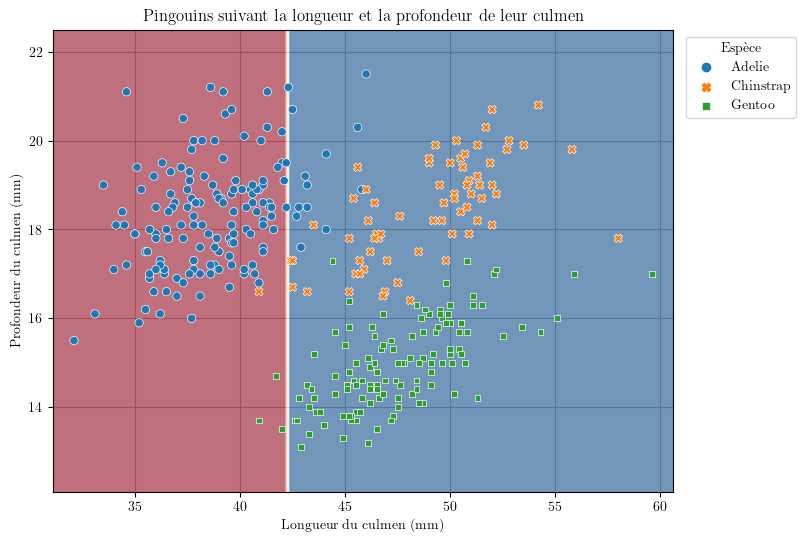

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(figsize=(8,6))

# Zones de prédiction de l'arbre
DecisionBoundaryDisplay.from_estimator(tree_model1, X, cmap='RdBu', alpha=0.6, ax=ax)

# Scatterplot de la profondeur du culmen des pingouins vs longueur du culmen
sns.scatterplot(data=df_peng, x='culmen_length_mm', y='culmen_depth_mm',
                hue='species', style='species', 
                ax=ax)

# titre et labels
plt.title("Pingouins suivant la longueur et la profondeur de leur culmen")
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")
# Légende
plt.legend(title='Espèce', bbox_to_anchor=(1.21,1))

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)
plt.show()

On remarque que l'arbre classe les pingouins suivant deux catégories, ce qui est logique pour un arbre binaire de profondeur 1. La décision de classification se fait sur la variable *culmen_length_mm* : les pingouins ayant une longueur de culmen inférieure à environ 42 mm sont dans un catégorie (sûrement Adélie) et les autres dans l'autre catégorie (définie comme Chintrap ou Gentoo). Avec une profondeur égale à 1, il est impossible de faire une classification en trois catégories.

## 4. Arbre de classification

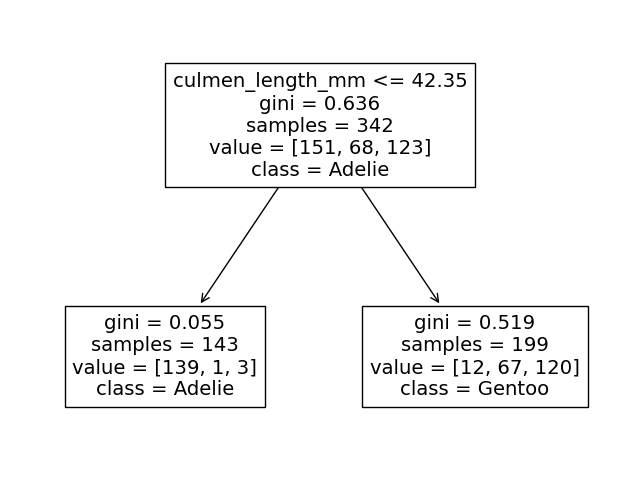

Ordre des espèces : ['Adelie', 'Chinstrap', 'Gentoo']


In [9]:
from sklearn.tree import plot_tree
plt.rcParams.update(plt.rcParamsDefault)

feature_names = X.columns.tolist()
classes = tree_model1.classes_.tolist()

fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(tree_model1, feature_names=feature_names,
          class_names=classes, ax=ax)

plt.show()
print(f"Ordre des espèces : {classes}")

On retrouve le fait que la décision de classification se fait sur la longueur du culmen : 
- Les pingouins ayant une longueur de culmen inférieure ou égale à 42.35 sont classés dans la catégorie « Adélie ». Cela concerne 143 pingouins sur les 342 de l'échantillon. Parmi eux, on compte 139 pingouins Adélie sur 151, 1 Chinstrap sur 68 et 3 Gentoo sur 123. 
- Les autres sont classés dans la catégorie « Gentoo ». 

Avec cette classification, l'espèce Chinstrap est ignorée et les pingouins correspondant sont toujours classés comme étant de l'espèce Adélie ou Gentoo.

## 5. Prédiction pour un nouvel échantillon

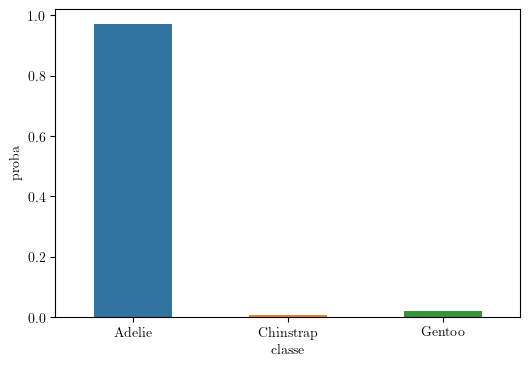

In [10]:
echant = pd.DataFrame({'culmen_length_mm':35, 'culmen_depth_mm':17}, index=[0])
proba = pd.DataFrame({'proba' : tree_model1.predict_proba(echant)[0].tolist(), 'classe':classes})

# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=proba, x='classe', y='proba', width=0.5)

plt.show()

In [11]:
display(proba)

,proba,classe
0,0.972028,Adelie
1,0.006993,Chinstrap
2,0.020979,Gentoo


Un échantillon dont le culmen a pour longueur 35 mm et pour profondeur 17 mm a une probabilité égale à 0.97 d'être de l'espèce Adélie, 0.007 d'être de l'espèce Chinstrap et 0.02 d'être de l'espèce Gentoo. Ce résultat est conforme aux effectifs de la feuille gauche de l'arbre :
- 139 pingouins sur 143 de cette feuille sont de l'espèce Adélie, soit une fréquence de $\small\dfrac{139}{143}\approx 0.97$.
- 1 pingouin sur 143 de cette feuille sont de l'espèce Chinstrap, soit une fréquence de $\small\dfrac{1}{143}\approx 0.007$.
- 3 pingouins sur 143 de cette feuille sont de l'espèce Gentoo, soit une fréquence de $\small\dfrac{139}{143}\approx 0.02$.

La méthode *predict_proba* considère donc les fréquences observées sur les données d'entraînement comme des probabilités théoriques. Il faut être prudent quant à l'interprétation des résultats lorsq'on utilise cette méthode : l'ensemble d'entraînement est-il représentatif de la population totale ?

## 6. Utilisation d'un arbre de profondeur 2

Création et entraînement du modèle.

In [12]:
# Instanciation d'un objet DecisionTreeClassifier
tree_model2 = DecisionTreeClassifier(max_depth=2)

# Données d'entraînement
X = df_peng.drop(['species','flipper_length_mm', 'body_mass_g'], axis=1)
y = df_peng['species']

# Entraînement model
tree_model2.fit(X,y)

DecisionTreeClassifier(max_depth=2)

Représentation des frontières de décision du modèle.

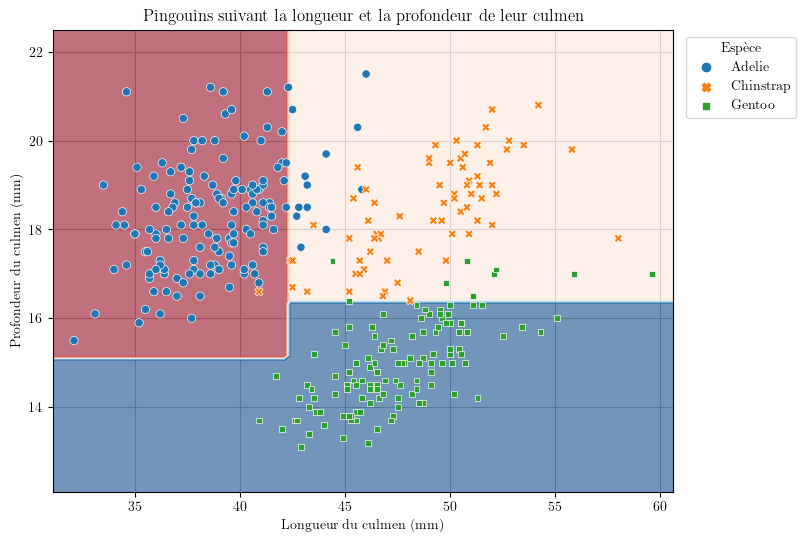

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

# Zones de prédiction de l'arbre
DecisionBoundaryDisplay.from_estimator(tree_model2, X, cmap='RdBu', alpha=0.6, ax=ax)

# Scatterplot de la profondeur du culmen des pingouins vs longueur du culmen
sns.scatterplot(data=df_peng, x='culmen_length_mm', y='culmen_depth_mm',
                hue='species', style='species', 
                ax=ax)

# titre et labels
plt.title("Pingouins suivant la longueur et la profondeur de leur culmen")
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")
# Légende
plt.legend(title='Espèce', bbox_to_anchor=(1.21,1))

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)
plt.show()

On remarque qu'à la profondeur 1, le modèle a fait le même découpage en deux catégories. Mais pour chacune de ces catégories, un nouveau découpage a été fait (profondeur 2 de l'arbre) pour donner 4 zones. Une espèce est attribuée à chaque zone. Le graphique précédent ne montre que 3 zones car les deux correspondant à l'espèce Gentoo ont été fusionnées.

Cet arbre est bien plus performant car il permet de créer une séparation (non parfaite) entre les pingouins Chinstrap et Gentoo. Les trois espèces sont donc représentées dans les catégories prédites.

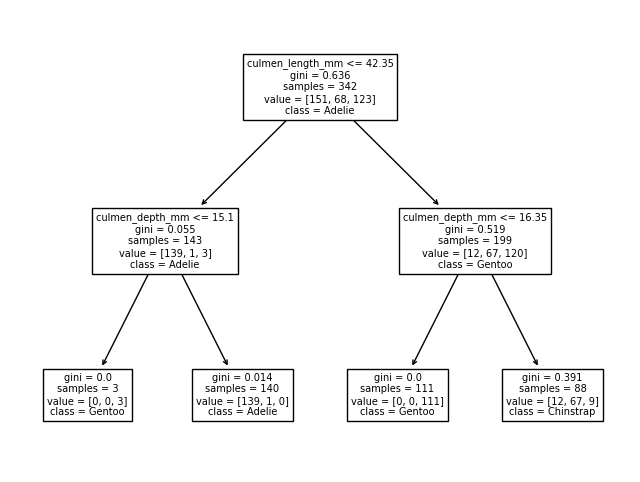

Ordre des espèces : ['Adelie', 'Chinstrap', 'Gentoo']


In [14]:
plt.rcParams.update(plt.rcParamsDefault)

feature_names = X.columns.tolist()
classes = tree_model2.classes_.tolist()

fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(tree_model2, feature_names=feature_names,
          class_names=classes, ax=ax)

plt.show()
print(f"Ordre des espèces : {classes}")

La représentation de l'arbre vient confirmer ce que nous affirmions précédemment : chaque ensemble du premier niveau de l'arbre a été divisé en deux sous ensemble. Nous obtenons donc 4 feuilles, dont deux correspondent à la catégorie Gentoo. Reprenons un nouvel échantillon (le même qu'à la question 1.5) et regardons les probabilités associées aux espèces de la catégorie dans laquelle cet échantillon est classé.

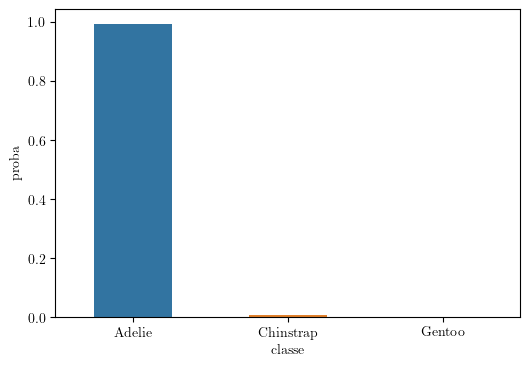

In [15]:
proba = pd.DataFrame({'proba' : tree_model2.predict_proba(echant)[0].tolist(), 'classe':classes})

# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=proba, x='classe', y='proba', width=0.5)

plt.show()

In [16]:
display(proba)

,proba,classe
0,0.992857,Adelie
1,0.007143,Chinstrap
2,0.000000,Gentoo


Si on suit le parcours de l'arbre pour le nouvel échantillon, on s'aperçoit que ce-dernier est classé dans la catégorie de la deuxième feuille en partant de la gauche, c'est à dire dans la catégorie Adélie. La fréquence de pingouins Adélie dans ce sous-ensemble est $\small\dfrac{139}{140}\approx 0.99$, d'où la probabilité donnée par scikit-learn. En faisant le calcul des fréquences pour le Gentoo et le Chinstrap, on trouve également les probabilités données par scikit-learn.